Мы - онлайн магазин спортивных товаров: одежды, обуви, аксессуаров и спорт-питания. На главной странице магазина мы показываем пользователям **баннеры с целью стимулирования своих продаж.** Сейчас там случайно показывается один из 5 баннеров. Каждый баннер рекламирует конкретный продукт или всю компанию.

Наши маркетологи считают, что опыт взаимодействия с баннерами может различаться по сегментам, а их эффективность - зависеть от особенностей пользовательского поведения.

У менеджера компании появилось предложение от партнеров: продать это место для баннера и рекламировать там другой сервис (оплата предполагается по CPC-модели, т.е. стоимость за клик).
Помогите менеджеру принять решение - нужно ли продавать это место для рекламы другого сервиса.

У вас есть информация о том, какой баннер показался пользователю, кликнул ли он на него, а так же информация о покупках пользователей.

* title - тип события (показ, клик или покупка)

* user - уникальный идентификатор клиента

* product - продукт баннера/покупки

* page_id - уникальный номер страницы для связки событий (NA для покупок)

* order_id - уникальный номер покупки (NA для кликов и показов баннера)

* time - время совершения действия

* site_version - версия сайта (мобильная или десктопная)


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('ha_data.csv', delimiter=';')
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [39]:
# Поменяем на подходящий формат для time и категориальных столбцов
df['time'] = pd.to_datetime(df['time'])
df['site_version'] = df['site_version'].astype('category')
df['product'] = df['product'].astype('category')
df['title'] = df['title'].astype('category')

In [40]:
df.describe(include='all')

,order_id,page_id,product,site_version,time,title,user
count,248722.000000,8.222504e+06,8471226,8471226,8471226,8471226,8471226
unique,NaN,NaN,5,2,NaN,3,4254621
top,NaN,NaN,clothes,mobile,NaN,banner_show,user_1934035
freq,NaN,NaN,1786438,6088340,NaN,7393319,23
mean,419014.864881,1.266396e+07,NaN,NaN,2017-03-24 09:10:40.759827200,NaN,NaN
min,1.000000,3.000000e+00,NaN,NaN,2017-01-01 00:00:03,NaN,NaN
25%,249551.500000,6.379249e+06,NaN,NaN,2017-02-15 12:19:33.249999872,NaN,NaN
50%,411646.000000,1.279075e+07,NaN,NaN,2017-03-29 15:16:17.500000,NaN,NaN
75%,580734.500000,1.896197e+07,NaN,NaN,2017-05-01 07:23:00,NaN,NaN
max,855750.000000,2.489722e+07,NaN,NaN,2017-05-31 23:59:58,NaN,NaN


Отрезок времени - от 2017-01-01 до 2017-05-31 - 5 месяцев

In [41]:
# Разделим составные данные
df['day'] = df['time'].dt.weekday
df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour
df['date'] = df['time'].dt.date

df.head()

,order_id,page_id,product,site_version,time,title,user,day,month,hour,date
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0,3,2,20,2017-02-09
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0,1,2,10,2017-02-07
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1,6,1,13,2017-01-29
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1,2,4,15,2017-04-12
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1,6,1,13,2017-01-29


In [42]:
df.isna().sum()

,0
order_id,8222504
page_id,248722
product,0
site_version,0
time,0
title,0
user,0
day,0
month,0
hour,0


order_id	8222504 + page_id	248722 = 8471226 => нет нулевых значений

In [43]:
print("Number of duplicates: {}".format(df.duplicated().sum()))

Number of duplicates: 0


In [44]:
cont_var = ['time', 'day', 'month',	'hour']
cat_var = ['product','site_version','title']

In [45]:
def frequency_table(variable):

    unique_elements, counts = np.unique(variable.dropna(), return_counts=True)

    percentages = (counts / len(variable)) * 100

    value_counts_and_percentages = zip(unique_elements, counts, percentages)

    for i, j, k in value_counts_and_percentages:
        print(f"{i}: Count: {j}, Percentage: {k:.2f}%")
    return


for var in cat_var:
    print (f"frequency table for {var}")
    frequency_table(df[var])
    print("Mode =", df[var].mode()[0])
    print ("#"*50)

frequency table for product
accessories: Count: 1621759, Percentage: 19.14%
clothes: Count: 1786438, Percentage: 21.09%
company: Count: 1725059, Percentage: 20.36%
sneakers: Count: 1703345, Percentage: 20.11%
sports_nutrition: Count: 1634625, Percentage: 19.30%
Mode = clothes
##################################################
frequency table for site_version
desktop: Count: 2382886, Percentage: 28.13%
mobile: Count: 6088340, Percentage: 71.87%
Mode = mobile
##################################################
frequency table for title
banner_click: Count: 829185, Percentage: 9.79%
banner_show: Count: 7393319, Percentage: 87.28%
order: Count: 248722, Percentage: 2.94%
Mode = banner_show
##################################################


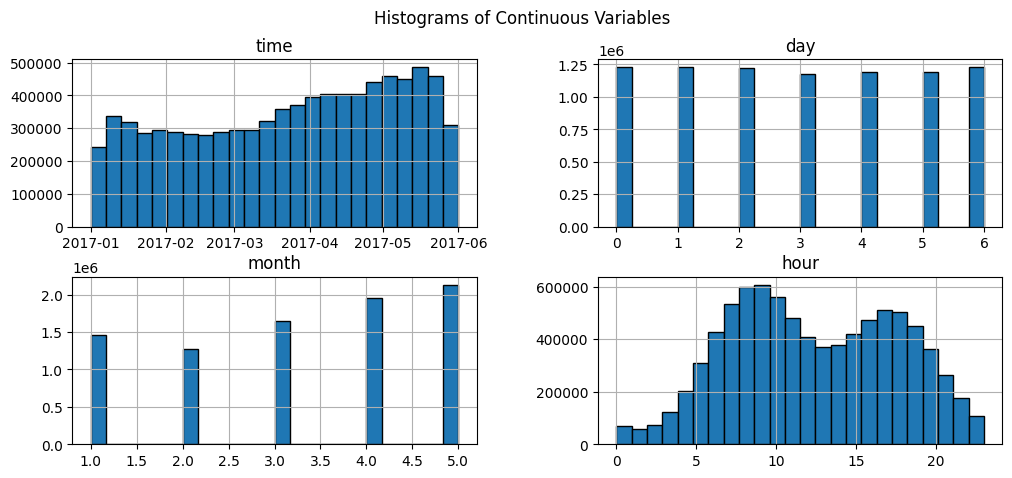

In [46]:
df[cont_var].hist(bins=24, figsize=(12, 5), edgecolor='black')

plt.suptitle('Histograms of Continuous Variables')
plt.show()

Увеличение кол-ва продаж по месяцам может быть связано с нг и с потеплением. Так же можно углубиться в исторические данные того года.

In [47]:
contingency_table = pd.crosstab(df['site_version'], df['title'])

print("Contingency Table with Frequencies:")
display(contingency_table)
print("#"*60)

row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nRow Percentages:")
display(row_percentages)

Contingency Table with Frequencies:


title,banner_click,banner_show,order
site_version,,,
desktop,115065,2134640,133181
mobile,714120,5258679,115541


############################################################

Row Percentages:


title,banner_click,banner_show,order
site_version,,,
desktop,4.828808,89.582129,5.589063
mobile,11.729306,86.372952,1.897742


Процент заказов очень мал. Хоть и большая активность наблюдается на мобильной версии, но заказов больше с десктопа. Так же можно заметить, что на десктопе кол-во заказов больше, чем кликов .

**Значит ли это, что пользователи сначала изучают ассортимент в мобильной версии, а потом идут за покупками с компьютера?**

In [48]:
# Фильтрация событий показа, клика и покупки
events = df[df['title'].isin(['banner_show', 'banner_click', 'order'])]

view_clicks = events[events['title'].isin(['banner_show', 'banner_click'])]

# Разделение на мобильные и десктопные версии
mobile_users = view_clicks[view_clicks['site_version'] == 'mobile']
desktop_users = view_clicks[view_clicks['site_version'] == 'desktop']

# Теперь нужно выявить пользователей, которые сначала использовали мобильную версию, а потом совершили покупку на десктопной
purchases = df[df['title'] == 'order']

# Сначала определим пользователей, которые использовали обе версии сайта
both_devices_users = mobile_users[mobile_users['user'].isin(desktop_users['user'].unique())]['user'].unique()

desktop_purchases = purchases[(purchases['site_version'] == 'desktop') & (purchases['user'].isin(both_devices_users))]

mobile_interactions = mobile_users[mobile_users['user'].isin(desktop_purchases['user'].unique())]

mobile_first_interaction = mobile_interactions.groupby('user')['time'].min().reset_index()
desktop_first_purchase = desktop_purchases.groupby('user')['time'].min().reset_index()

# Объединим данные по пользователям
user_journey = pd.merge(mobile_first_interaction, desktop_first_purchase, on='user', suffixes=('_mobile', '_desktop'))

# Рассчитаем время между первым взаимодействием на мобильном устройстве и покупкой на десктопе
user_journey['time_diff'] = pd.to_datetime(user_journey['time_desktop']) - pd.to_datetime(user_journey['time_mobile'])

print(user_journey)

average_time_diff = user_journey['time_diff'].mean()
print("Среднее время между взаимодействием на мобильной версии и покупкой на десктопе:", average_time_diff)


              user         time_mobile        time_desktop          time_diff
0     user_1000184 2017-02-15 09:37:27 2017-02-25 20:25:29   10 days 10:48:02
1      user_100049 2017-01-18 05:41:48 2017-01-09 12:34:09  -9 days +06:52:21
2      user_100378 2017-02-05 12:44:46 2017-02-06 12:41:21    0 days 23:56:35
3     user_1005844 2017-01-24 21:51:13 2017-02-19 09:09:40   25 days 11:18:27
4     user_1010366 2017-02-03 13:27:26 2017-01-25 21:22:53  -9 days +07:55:27
...            ...                 ...                 ...                ...
2525   user_995757 2017-03-20 12:39:54 2017-02-20 02:05:32 -29 days +13:25:38
2526   user_996613 2017-02-20 07:39:36 2017-03-25 15:32:50   33 days 07:53:14
2527    user_99776 2017-02-11 17:06:31 2017-01-22 12:53:41 -21 days +19:47:10
2528   user_999064 2017-01-16 11:06:58 2017-01-24 22:21:48    8 days 11:14:50
2529   user_999909 2017-01-16 20:00:06 2017-01-16 07:53:44  -1 days +11:53:38

[2530 rows x 4 columns]
Среднее время между взаимодействием на 

Среднее время между первым взаимодействием пользователя на мобильной версии сайта и его покупкой на десктопе составляет около 8 дней. Это подтверждает гипотезу, что пользователи часто просматривают ассортимент с мобильных устройств, а затем возвращаются и совершают покупку через десктопную версию сайта спустя значительное время. Поэтому мы должны постоянно напоминать клиентам о продуктах на разных платформах с помощью баннеров, чтобы превратить потенциальных клиентов в продажи.


In [49]:
# как показы и клики влияют на вероятность совершения покупки. сравним это для разных версий сайта
events = df[df['title'].isin(['banner_show', 'banner_click', 'order'])]

banner_views = events[events['title'] == 'banner_show'].groupby(['product', 'site_version'])['user'].count().reset_index()
banner_views.rename(columns={'user': 'views'}, inplace=True)

banner_clicks = events[events['title'] == 'banner_click'].groupby(['product', 'site_version'])['user'].count().reset_index()
banner_clicks.rename(columns={'user': 'clicks'}, inplace=True)

banner_data = pd.merge(banner_views, banner_clicks, on=['product', 'site_version'], how='left')
banner_data['clicks'] = banner_data['clicks'].fillna(0)

banner_data['CTR'] = banner_data['clicks'] / banner_data['views']


banner_clicks_users = events[events['title'] == 'banner_click']['user'].unique()
purchases_after_click = events[(events['title'] == 'order') & (events['user'].isin(banner_clicks_users))]

banner_purchases = purchases_after_click.groupby(['product', 'site_version'])['user'].count().reset_index()
banner_purchases.rename(columns={'user': 'purchases'}, inplace=True)

# Объединение данных по кликам и покупкам
banner_data = pd.merge(banner_data, banner_purchases, on=['product', 'site_version'], how='left')
banner_data['purchases'] = banner_data['purchases'].fillna(0)

banner_data['conversion_rate'] = banner_data['purchases'] / banner_data['clicks']

# Фильтрация кликов и покупок
clicks_data = events[events['title'] == 'banner_click'][['user', 'product', 'time', 'site_version']]
purchases_data = purchases_after_click[['user', 'product', 'time', 'site_version']]

# Объединение данных для расчета времени между кликом и покупкой
click_purchase_data = pd.merge(clicks_data, purchases_data, on=['user', 'product', 'site_version'], suffixes=('_click', '_order'))

# Вычисление времени до покупки
click_purchase_data['time_to_purchase'] = pd.to_datetime(click_purchase_data['time_order']) - pd.to_datetime(click_purchase_data['time_click'])

# Среднее время до покупки по баннерам
avg_time_to_purchase = click_purchase_data.groupby(['product', 'site_version'])['time_to_purchase'].mean().reset_index()

banner_data = pd.merge(banner_data, avg_time_to_purchase, on=['product', 'site_version'], how='left')
print(banner_data)


            product site_version    views  clicks       CTR  purchases  \
0       accessories      desktop   410003   18531  0.045197       6123   
1       accessories       mobile  1030951  117723  0.114189      16154   
2           clothes      desktop   418070   32781  0.078410      19132   
3           clothes       mobile  1035058  187814  0.181453      32291   
4           company      desktop   477374   28464  0.059626          0   
5           company       mobile  1102864  116357  0.105504          0   
6          sneakers      desktop   411598   21419  0.052039       8967   
7          sneakers       mobile  1041431  161178  0.154766      25022   
8  sports_nutrition      desktop   417595   13870  0.033214       3063   
9  sports_nutrition       mobile  1048375  131048  0.125001       8665   

   conversion_rate            time_to_purchase  
0         0.330419   0 days 23:59:09.586926286  
1         0.137220   0 days 02:19:10.878662420  
2         0.583631   0 days 01:32:36.4

1. Мобильные баннеры привлекают больше внимания (высокий CTR), но их эффективность в конверсии в покупку ниже, чем на десктопе.
2. Десктопные баннеры реже привлекают клики, но имеют более высокую конверсию в покупку, особенно для категорий "clothes" и "sneakers".
3. Баннеры компании привлекают внимание, но не приводят к покупкам. Возможно, их место стоит использовать более эффективно для других предложений.


 Учитывая высокую кликабельность и конверсию для некоторых товаров, не стоит продавать это рекламное место другим сервисам, особенно для категорий с высокой конверсией. Лучше продолжать использовать его для продвижения собственных товаров, оптимизируя баннеры под разные версии сайта и категории товаров.

In [50]:
# Предположим
average_order_value = 100  # средний доход с одной покупки в текущей модели
cpc_value = 0.5  # стоимость за клик по модели CPC

banner_data['current_revenue'] = banner_data['purchases'] * average_order_value

# Общий доход по текущей модели
total_current_revenue = banner_data['current_revenue'].sum()

banner_data['cpc_revenue'] = banner_data['clicks'] * cpc_value

# Общий доход по модели CPC
total_cpc_revenue = banner_data['cpc_revenue'].sum()

print("Общий доход по текущей модели:", total_current_revenue)
print("Общий доход по модели CPC:", total_cpc_revenue)

if total_current_revenue > total_cpc_revenue:
    print("Текущая модель приносит больше дохода.")
else:
    print("Модель CPC приносит больше дохода.")


Общий доход по текущей модели: 11941700
Общий доход по модели CPC: 414592.5
Текущая модель приносит больше дохода.


Так же стоит учесть в сравнении убыток в продажах без стимуляции баннерами.